**Titanic Dataset Analysis**

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the Titanic dataset (replace 'titanic.csv' with your actual file path)
titanic_df = pd.read_csv('titanic_dataset.csv')

# Display the first 5 rows of the dataset
print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [7]:
print(titanic_df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


**Missing Data Consideration**

In [10]:
# Check for missing data (NaN values) in each column
missing_data = titanic_df.isnull().sum()

# Display the total missing values for each column
print(missing_data)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
# Calculate number of missing values in each row
missing_per_row = titanic_df.isnull().sum(axis=1)

# Calculate percentage of missing values for each row
missing_percentage = (missing_per_row / titanic_df.shape[1]) * 100

# Present the first five rows of the percentage of missing data
print(missing_percentage.head())

0    8.333333
1    0.000000
2    8.333333
3    0.000000
4    8.333333
dtype: float64


In [67]:
# Check for missing values in the 'Age' column
missing_age = titanic_df['Age'].isnull()

# Add a new column to the dataframe to indicate missing ages (True or False)
titanic_df['Missing_Age'] = missing_age

# Group the data by 'Pclass' and calculate the proportion of missing 'Age' in each class
missing_age_by_class = titanic_df.groupby('Pclass')['Missing_Age'].mean() * 100

# Display the proportion of missing age data for each class
print(missing_age_by_class)

Pclass
1    13.888889
2     5.978261
3    27.698574
Name: Missing_Age, dtype: float64


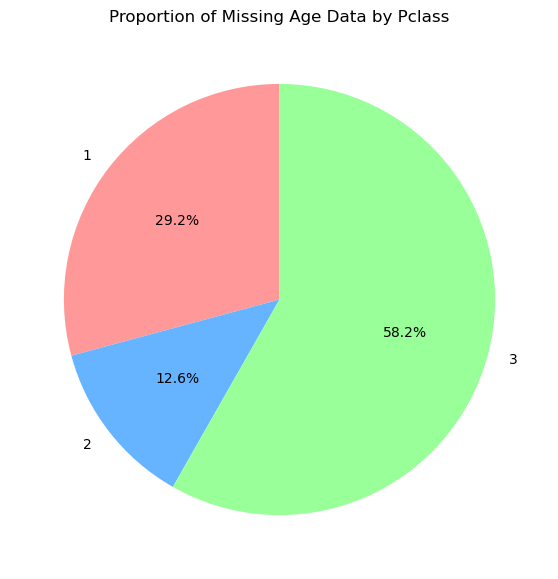

In [61]:
# Passenger class 3 has the highest proportion of missing age data.  This is shown in the following pie chart.

# Create a pie chart to visualize the missing age data by class
plt.figure(figsize=(7,7))  # Set the figure size
missing_age_by_class.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])

# Title and labels
plt.title('Proportion of Missing Age Data by Pclass')
plt.ylabel('')  # Remove the default 'y' label

# Show the pie chart
plt.show()

**Impute Missing Data**

In [69]:
# Impute missing numeric data with the mean of each column
numeric_columns = titanic_df.select_dtypes(include=['float64', 'int64']).columns
titanic_df[numeric_columns] = titanic_df[numeric_columns].fillna(titanic_df[numeric_columns].mean())

# Impute missing categorical data with the mode of each column
categorical_columns = titanic_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    titanic_df[col] = titanic_df[col].fillna(titanic_df[col].mode()[0])

titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Missing_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,False


**Gender Consideration**

In [12]:
import pandas as pd

# Create a new 'Gender' column, where 'female' = 0 and 'male' = 1
titanic_df['Gender'] = titanic_df['Sex'].map({'female': 0, 'male': 1})

titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_encoded,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.530377,0.432793,-0.473674,A/5 21171,-0.502445,Unknown,S,147,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.571831,0.432793,-0.473674,PC 17599,0.786845,C85,C,81,0
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.254825,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,Unknown,S,147,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.365167,0.432793,-0.473674,113803,0.420730,C123,S,55,0
4,5,0,3,"Allen, Mr. William Henry",male,0.365167,-0.474545,-0.473674,373450,-0.486337,Unknown,S,147,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,-0.185937,-0.474545,-0.473674,211536,-0.386671,Unknown,S,147,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,-0.737041,-0.474545,-0.473674,112053,-0.044381,B42,S,30,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,0.432793,2.008933,W./C. 6607,-0.176263,Unknown,S,147,0
889,890,1,1,"Behr, Mr. Karl Howell",male,-0.254825,-0.474545,-0.473674,111369,-0.044381,C148,C,60,1


In [100]:
# Group the data by 'Gender' and aggregate the required columns with sum, mean, and unique counts
aggregated_data = titanic_df.groupby('Gender')[['Pclass', 'Fare', 'Age']].agg(
    {'Pclass': 'nunique',            # Count the unique classes in 'Pclass'
     'Fare': ['sum', 'mean', 'nunique'],  # Sum, mean, and unique for 'Fare'
     'Age': ['sum', 'mean', 'nunique']}   # Sum, mean, and unique for 'Age'
).reset_index()

# Flatten the MultiIndex columns to make the output more readable
aggregated_data.columns = ['_'.join(col).strip() for col in aggregated_data.columns.values]

# Convert the result into a dictionary using 'records' format
result_dict = aggregated_data.to_dict(orient='records')

# Display the dictionary result in a readable format
for entry in result_dict:
    print(entry)

{'Gender_': 0, 'Pclass_nunique': 3, 'Fare_sum': 13966.6628, 'Fare_mean': 44.47981783439491, 'Fare_nunique': 156, 'Age_sum': 7286.0, 'Age_mean': 27.915708812260537, 'Age_nunique': 63}
{'Gender_': 1, 'Pclass_nunique': 3, 'Fare_sum': 14727.2865, 'Fare_mean': 25.52389341421144, 'Fare_nunique': 193, 'Age_sum': 13919.17, 'Age_mean': 30.72664459161148, 'Age_nunique': 82}


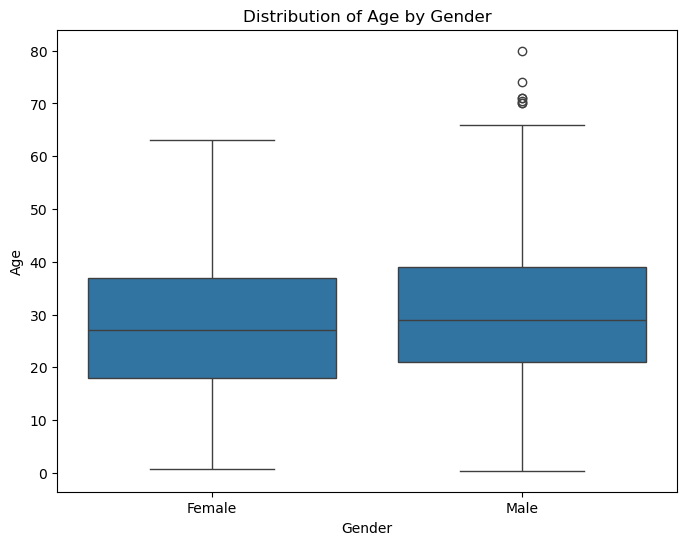

In [106]:
# Check if the 'Sex' column exists and create a new 'Gender' column
if 'Sex' in titanic_df.columns:
    titanic_df['Gender'] = titanic_df['Sex'].map({'female': 0, 'male': 1})

# Ensure there are no missing values in the 'Gender' and 'Age' columns
titanic_df = titanic_df.dropna(subset=['Gender', 'Age'])

# Set up the plot size for better visibility
plt.figure(figsize=(8, 6))

# Create a box plot for Gender vs Age
sns.boxplot(x='Gender', y='Age', data=titanic_df)

# Set labels for the Gender values (Female, Male instead of 0, 1)
plt.xticks([0, 1], ['Female', 'Male'])

# Add titles and labels to the plot
plt.title('Distribution of Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')

# Show the plot
plt.show()

**Low Variance Features Considered**

In [ ]:
#Please find this section in my notebook entitled Snider_SD754_CleaningDataII

**Label Enncoding Method**

In [6]:
# Check the first few rows to inspect the 'Cabin' column
print(titanic_df['Cabin'].head())

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Handle missing values: If there are any missing values in 'Cabin', fill them with a placeholder, such as 'Unknown'
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('Unknown')

# Apply label encoding to the 'Cabin' column
titanic_df['Cabin_encoded'] = label_encoder.fit_transform(titanic_df['Cabin'])

# Display the first few rows of the dataframe to verify the encoding
print(titanic_df[['Cabin', 'Cabin_encoded']].head())
titanic_df

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object
     Cabin  Cabin_encoded
0  Unknown            147
1      C85             81
2  Unknown            147
3     C123             55
4  Unknown            147


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,147
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,81
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,147
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,55
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,147
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S,147
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,30
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,Unknown,S,147
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,60
